### MACHINE LEARNING PROJECT

I'll try to build and train a ML model to predict if a painting is an original paiting from a known artist. I decided to start form a list of 15 artis with a noticeable style difference:
* Andy Warhol
* Caravaggio
* Claude Monet
* Diego Rivera
* Diego Velazquez
* *Edgar Degas (TODO)*
* *Francisco de Goya (TODO)*
* Frida Kahlo
* Gustav Klimt
* Jackson Pollock
* *Joaquín Sorolla (TODO)*
* Katsushika Hokusai
* Pablo Picasso
* Piet Mondrian
* Roy Lichtenstein
* Wassily Kandinsky

I set three objectives:
* Classify if Picasso or Monet
* Classify by *'school' or 'style'*
* Classify by artist

I will use the following characteristics to try to classify the images:
* Colors used
* Hue, saturation and value
* Filling
* Dimension ratio

___

___
### PREREQUISITES

To process images I'll be using OpenCV library. It is important to take a look at the [docs][OpenCV installation and usage] before running the next cell.
For this project I'll use the 'main modules package'

[OpenCV installation and usage]:https://pypi.org/project/opencv-python/

In [10]:
# !pip install opencv-python

___
### IMPORTS

In [28]:
# Modules used for data handling / test
import os
import time


# Modules used for EDA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.patches import Rectangle


# Modules used for image processing
import cv2

from collections import Counter


# Modules used for ML
from sklearn.cluster import KMeans

In [2]:
# Utils
from utils import color_quant, hex_to_rgb, fill_ratio, get_img_rgb
from utils import reduce_col_palette, resize_img, rgb_to_hex, process_color

In [3]:
# Modules settings
%matplotlib inline

___
### UPDATE UTILS

In [189]:
# This cell only needs to be executed to update utils
# if modified after them have been imported

%run utils

___
### GETTING IMAGES

In [211]:
def get_collection(working_path=None, extensions: list=[]):
    '''
    This function will generate a list will all the paths of archives found
    in the selected working directory that have a valid extension.
    '''
    
    # Locate path and get all candidates path
    candidates = os.listdir(working_path)
    ### TODO - Get files in subfolders

    # Declare an empty list to append valid files path found iterating candidates
    collection = []
    valid_extension = extensions

    for file in candidates:
        # Check if image has a valid extension
        file_ext = os.path.splitext(file)[1]
        
        if file_ext.lower() in valid_extension: collection.append(file)
        else: continue
        
    return (working_path, collection)

collection = get_collection('./images/sample_img', ['.jpg', '.jpeg'])

collection

('./images/sample_img',
 ['sample.jpeg',
  'R&M_01.jpg',
  'R&M_02.jpg',
  'R&M_03.jpg',
  'R&M_04.jpg',
  'R&M_05.jpg',
  'px.jpg',
  'px_mini.jpg',
  'px_micro.jpg',
  'px_nano.jpg',
  '187120.jpg'])

In [ ]:
def show_collection(path, collection):
    for i in range(len(collection)):
        img_path = path + collection[i]
        image = mpimg.imread(img_path)
        image_res = resize_img(image, 50)
    
        plt.figure()
        plt.imshow(image_res)
        
show_collection(path, collection)

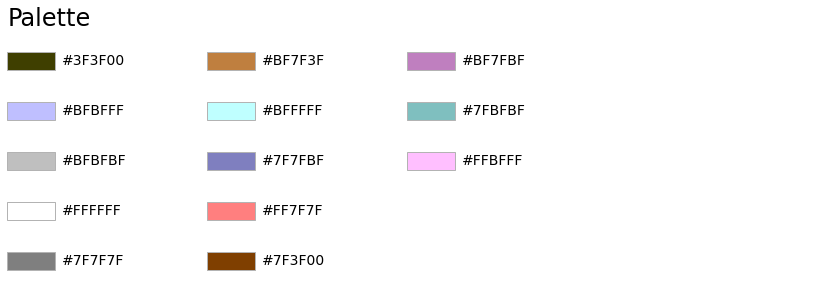

In [210]:
def plot_palette(colors, title, sort_colors=False, emptycols=0):
    cell_width = 200
    cell_height = 50
    swatch_width = 48
    margin = 12
    topmargin = 40

    ### TODO - Sort colors by RGB index
        
    names = list(colors)
    
    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, 
                        margin/height,
                        (width-margin)/width,
                        (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5),
                -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title,
                 fontsize=24,
                 loc="left",
                 pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(Rectangle(xy=(swatch_start_x, y-9),
                               width=swatch_width,
                               height=18,
                               facecolor=colors[name],
                               edgecolor='0.7'))

    return fig

plot_palette(quant, 'Palette',
             sort_colors=True,
             emptycols=1)

plt.show()

In [30]:
def import_img_data(collection):
    path = collection[0]
    collection = collection[1]
    
    for i in range(len(collection)):
        # Get image and resize
        img_path = path + collection[i]
        img = get_img_rgb(img_path)
        
        # Reduce color palette
        img = resize_img(img, 100)
        img = reduce_col_palette(img, 5)
        
        # Extract data
        img_ratio = round((img.shape[0] / img.shape[1]) * 2) / 2
        quant = color_quant(sample, 5, num_of_colors=15, show_chart=False)
        filling = fill_ratio(sample)
        
        
        


___
### IMAGES MANIPULATION

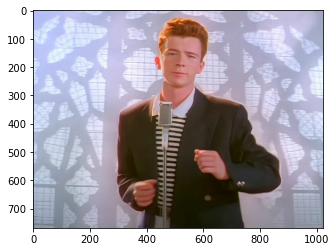

In [222]:
sample = get_img_rgb('./images/sample_img/sample.jpeg')
# sample = get_img_rgb('./images/sample_img/px_nano.jpg')
plt.imshow(sample);

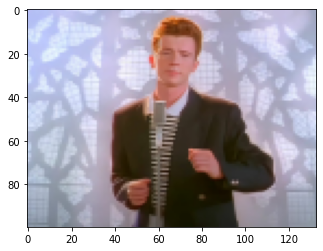

In [223]:
sample = resize_img(sample, 100)
plt.imshow(sample);

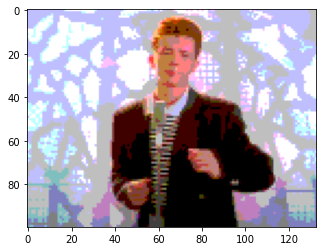

In [224]:
sample = reduce_col_palette(sample, 5)
plt.imshow(sample);

Colors found:


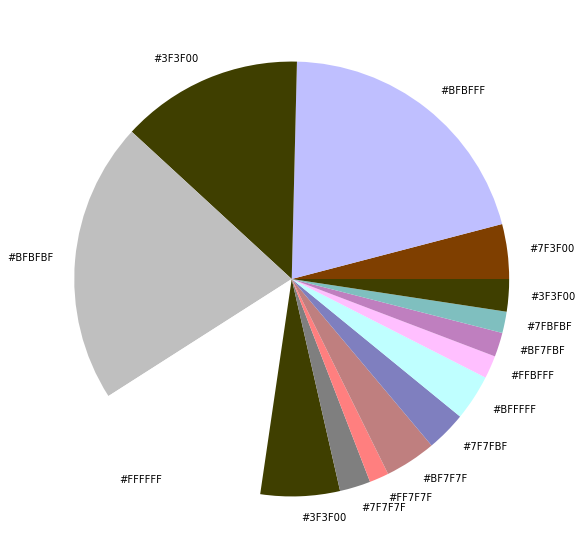

In [225]:
quant = color_quant(sample, 5, num_of_colors=15)

In [226]:
quant

{'#7F3F00': '#7F3F00',
 '#BFBFFF': '#BFBFFF',
 '#3F3F00': '#3F3F00',
 '#BFBFBF': '#BFBFBF',
 '#FFFFFF': '#FFFFFF',
 '#7F7F7F': '#7F7F7F',
 '#FF7F7F': '#FF7F7F',
 '#BF7F7F': '#BF7F7F',
 '#7F7FBF': '#7F7FBF',
 '#BFFFFF': '#BFFFFF',
 '#FFBFFF': '#FFBFFF',
 '#BF7FBF': '#BF7FBF',
 '#7FBFBF': '#7FBFBF'}

In [227]:
fill_ratio(sample)

86.3609022556391

In [ ]:
def claroscuro(image):

___
### TODO / TEST

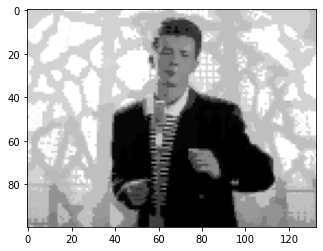

In [22]:
sample_bw = cv2.cvtColor(sample, cv2.COLOR_BGR2GRAY)
plt.imshow(sample_bw, cmap='gray');

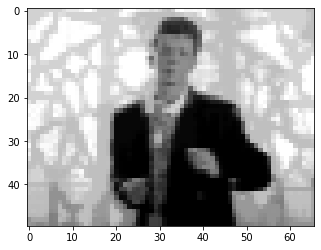

In [23]:
sample_bw = resize_img(sample_bw, 50)
plt.imshow(sample_bw, cmap='gray');

In [24]:
reduce_col_palette(sample_bw, 2);
# color_quant_bw(sample_bw, 8);  ### TODO - color_quant_bw

Palette reduced to 8 colors.
